In [1]:
import numpy as np
from astropy import constants as cc, units as uu

In [2]:
# fine constant
alpha=(1/4/np.pi/cc.eps0*cc.e.si**2/cc.hbar/cc.c).si

In [3]:
m_H = cc.m_p+cc.m_e
N = (uu.kg/m_H).si
lambda_1= cc.h/(m_H*cc.c)
P=(cc.eps0*cc.c**2*lambda_1/(2*np.pi**2)/N/cc.e.si**2*uu.kg).si * (2*np.pi)
B= 1/(4*np.pi**2*alpha)
lambda_1, N, P * (2*np.pi*alpha)

(<Quantity 1.32069058e-15 s2 J / (kg m)>,
 <Quantity 5.97538311e+26>,
 <Quantity 1.>)

In [5]:
1/2 * np.pi * alpha 

0.011465666618940851

In [6]:
m_H = (cc.m_p + cc.m_e).si
lambda_1 = (cc.h/(m_H*cc.c)).si

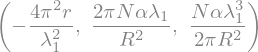

In [10]:
from sympy import symbols, cos, diff, pi, simplify, sin, init_printing, solve
init_printing()

# Define variables and constants
r, R, lambda_1, lambda_2, alpha, N, P, e, epsilon_0, h,c  = symbols('r R lambda_1 lambda_2 alpha N P e epsilon_0 h c')
k1 = 2 * pi / lambda_1
k2 = 2 * pi * N / lambda_1
lambda_2 = lambda_1/N
P = 1 / (2 * pi * alpha)

# Define the envelope for Phi_2 with simplification for highly oscillatory function
Phi_2 = 1 / (1 + P * (R - r)/lambda_1)
# Derivative of Phi_2 after simplification (R>>r, alpha*k2*R >>1)
dPhi_2_dr_simplified =  (lambda_1**2/lambda_2) / (P* R**2)
alpha = e**2/(2*epsilon_0*h*c)
# Define Phi_1 with consideration of small angle (sin(k1*r) ≈ k1*r)
Phi_1 = cos(k1 * r) / (1 + P/lambda_1 * r )
# Simplified derivative of Phi_1 considering dcos(k1 * r)/dr = -k1*sin(k1*r) ≈ -k1^2*r and 1+alpha*k1*r ≈ 1 for very small r
# one also considers that the envelope varies slowly within the small distances defined by r
dPhi_1_dr_simplified = -k1**2 * r 

# Sum the simplified derivatives to get the total derivative
dPhi_total_dr_simplified = dPhi_1_dr_simplified + dPhi_2_dr_simplified

# Solve the simplified total derivative for r
solution_r = solve(dPhi_total_dr_simplified, r)
x= solution_r[0]
# x = x.subs(P, 1/(2*pi*alpha)) #.subs(alpha,e**2/(2*epsilon_0*h*c)) 
# x = x.subs( P, 1/(2*pi*alpha))
dPhi_1_dr_simplified , dPhi_2_dr_simplified, x

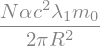

In [11]:
# Define the symbols
m_0, c, lambda_1, N, R, alpha, kg, epsilon_0, e, v, h, kg = symbols('m_0 c lambda_1 N R alpha kg epsilon_0 e v h kg')
init_printing()



# tanh(theta) = v/c acceleration felt by a single dilator actuated by N dilators is given by:
#acceleration = c dtanh(tetha)/dr= c (1-tanh(theta)**2) * dtheta/dr 
#acceleration = c (1-tanh(theta)**2) * x/lambda1**2
# Force is given by c (1-v**2/c**2) * lambda_1**3/(8*pi**3*N*R**2*alpha)/lambda1**2
# The force is given by kg*acceleration. where m0 = Fundamental Dilator 4D mass = 1 kg/N
# That is the force between 1 kg of dilators and one dilator
# Given the force equation for electromagnetic interaction
F = (m_0 * c**2 * x/lambda_1**2)
F

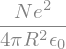

In [12]:

# Substitute m_0 with 1/N, where N is the number of dilators in 1 kg
F_substituted = F.subs(kg, N*h/c/lambda_1)
# Simplify the expression
F_simplified = simplify(F_substituted)
alpha_expr = e**2 / (2 * epsilon_0 * h * c)
F_simplified = F_simplified.subs(alpha, alpha_expr)
F_simplified = F_simplified.subs(m_0, h/c/lambda_1)
# This will print the simplified force equation
F_simplified


In [13]:
def mom_inertia0(r, h):
    return 1/12*(3*r**2+h)

def mom_inertia1(r):
    return 1/2*r**2

m_H = (cc.m_e+cc.m_p).si
lambda1 = (cc.h/(m_H*cc.c)).to(uu.m)
t1 = lambda1/cc.c
alpha_value = cc.e.si**2 / (2 * cc.eps0 * cc.h * cc.c)
A =1/(2*np.pi*alpha_value)
B = 2*np.pi**2

TotalRadius = (A/ (2*np.pi**2))**(1/3)
UniverseThickness = (TotalRadius-1)/2
r_p = 8.414e-16
r_e = r_p*cc.m_e/cc.m_p
g_e = mom_inertia1(r_e)/mom_inertia0(r_e, UniverseThickness)
g_p = mom_inertia1(r_p)/mom_inertia0(r_p, UniverseThickness)
print("Radii")
print( r_e, r_p)
print("Moments of Inertia")
print( mom_inertia0(r_e, UniverseThickness),mom_inertia0(r_p, UniverseThickness),mom_inertia1(r_e),mom_inertia1(r_p))
print("Universe Thickness", UniverseThickness)
print("4D electron radius", TotalRadius)
print("Compton Values", lambda1, t1)
# print( "g-values", g_e, g_p)

Radii
4.58240761877198e-19 8.414e-16
Moments of Inertia
0.0014088450435480182 0.0014088450435480182 1.0499229792289743e-37 3.5397698000000003e-31
Universe Thickness 0.01690614052257622
4D electron radius 1.0338122810451524
Compton Values 1.3206905848167287e-15 m 4.405349599611104e-24 s


In [45]:
(2*np.pi*alpha_value), 1/(2*np.pi**2)

(<Quantity 0.04585062 C2 / (F J)>, 0.05066059182116889)

# The Energy of the Fundamental Dilator is being modeled by circles.
# At each expansion step with length $\lambda_1$, the energy (valued at 1 or unit) is distributed
# over a hyperspherical hypersurface of radius $\lambda_1$, which is normalized to One
$$ 2 \pi \alpha = \frac{1}{2 \pi^2 r^3} $$
or
$$ r = ( \frac{1}{4 \pi^3 \alpha } ) ^{1/3} $$


In [52]:
StateLifetime = (1/(4*np.pi**3*alpha_value)**(1/3)-1)
StateLifetime = StateLifetime*lambda1/cc.c
# A hydrogen atom has twice the 4D mass of a Fundamental Dilator
DeltaE = 2*m_H*cc.c**2
StateLifetime_PerHeisenbergPrinciple = (cc.h/(4*np.pi)/DeltaE).si
StateLifetime/StateLifetime_PerHeisenbergPrinciple 

<Quantity 0.84979531>

# Deriving Laws of Nature for Inertial Frames

check if velocity is normalized!!!!


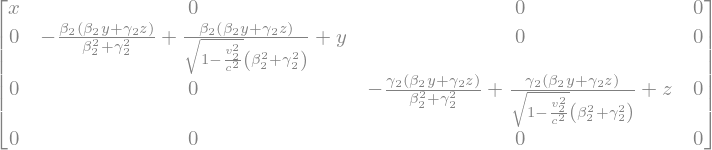

In [14]:
from sympy import symbols, sqrt, Matrix, cos, sin
from sympy.vector import CoordSys3D

# Define symbols
v1, v2, lambda_1, lambda_2, c, x, y, z, t, alpha, beta, gamma = symbols('v1 v2 lambda_1 lambda_2 c x y z t alpha beta gamma')

from sympy import symbols

# Define the variables in SymPy
c, v_1x, v_1y, v_1z, v_2x, v_2y, v_2z, R0 = symbols('c v_1x v_1y v_1z v_2x v_2y v_2z R0')
v1, v2, alpha_0, beta_0, gamma_0, alpha_1, beta_1, gamma_1, alpha_2, beta_2, gamma_2 = symbols('v1 v2 alpha_0 beta_0 gamma_0 alpha_1 beta_1 gamma_1 alpha_2 beta_2 gamma_2')


def Lorentz(V, v, HU=True):
    print("check if velocity is normalized!!!!")
    alpha, beta, gamma = V
    cos_v = 1/sqrt(1-v**2/c**2)
    sin_v = v/c/sqrt(1-v**2/c**2)
    
    N = CoordSys3D('N')
    r = x*N.i + y*N.j + z*N.k
    V_vec = alpha*N.i + beta*N.j + gamma*N.k
    r_parallel = (r.dot(V_vec))*V_vec/V_vec.magnitude()**2
    r_perpendicular = r - r_parallel
    r_parallel_exp = Matrix([r_parallel.dot(N.i), r_parallel.dot(N.j), r_parallel.dot(N.k), 0])
    r_perpendicular_exp = Matrix([r_perpendicular.dot(N.i), r_perpendicular.dot(N.j), r_perpendicular.dot(N.k), 0])
    t_exp = Matrix([0, 0, 0, t])
    r_out = cos_v*r_parallel_exp + r_perpendicular_exp - sin_v*t_exp
    t_out = sin_v*r_parallel_exp + cos_v*t_exp

    M = Matrix.zeros(4)
    for i in range(3):  # x, y, z
        M[i, i] = r_out[i]
    M[3, 3] = 1 if HU else 0  # Adjusting for HU parameter

    return M


v_2_hat = [0,beta_2, gamma_2]
Lorentz(v_2_hat, v2, HU=False)


check if velocity is normalized!!!!


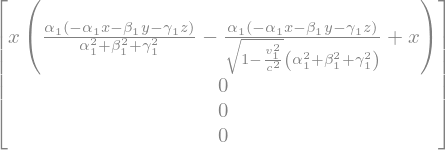

In [15]:
# Define necessary symbols
x, y, z, alpha_1, beta_1, gamma_1, v1 = symbols('x y z alpha_1 beta_1 gamma_1 v1')

# Define vectors
v_1_hat = Matrix([alpha_1, beta_1, gamma_1])
r1_frame1 = Matrix([x, 0, 0, 0])  # Position vector in Frame 1

# Apply the Lorentz transformation (assuming Lorentz function is defined as shown before)
r_frame0 = Lorentz(-v_1_hat, v1, HU=False) * r1_frame1  # Transform to Frame 0

# Display the resulting vector
r_frame0

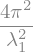

In [16]:
from sympy import symbols, Matrix, sqrt, pi, cos, diff, series

# Define necessary symbols
x, y, z, lambda_1 = symbols('x y z lambda_1')
R_0_hat = Matrix([0, 1, 0, 1])  # Origin of Frame1 in SymPy notation

# Assuming r1_frame1 is already defined as shown in previous messages
d1 = sqrt(r1_frame1.dot(r1_frame1))

k1d1 = 2*pi/lambda_1*d1
fi_1 = cos(k1d1)/(1+k1d1)

# Expand fi_1 in a Taylor series around x=0, up to second order (including)
fi_1_series = series(fi_1, x, 0, 3).removeO()  # removeO() removes the order term

# Differentiate fi_1 with respect to x and find the coefficient of x
dfi_1 = diff(fi_1_series, x)
# Find the coefficient of x in the differentiated series
dfi_1_coefficient_x = dfi_1.coeff(x)

dfi_1_coefficient_x
